In [1]:
import pandas as pd

In [2]:
df_train = pd.read_json("data/train/train.json", orient="index").reset_index()
df_train.columns = ["filename", "description"]
df_train

,filename,description
0,1699168556.1432111.mp3,The recording features a live performance of a...
1,1699168565.7955616.mp3,"The recording features a mellow piano melody, ..."
2,1699168589.6105175.mp3,The recording features an electro song that co...
3,1699168567.8103771.mp3,This music is an electronic instrumental. The ...
4,1699168575.4547818.mp3,The recording features an electro song that co...
...,...,...
9995,1699168570.7434902.mp3,The recording features a traditional song that...
9996,1699168578.7201939.mp3,The recording features an arpeggiated electric...
9997,1699168585.7472737.mp3,The recording features an arpeggiated acoustic...
9998,1699168586.015741.mp3,This instrumental song features a harp playing...


In [3]:
df_test = pd.read_json("data/test/public.json", orient="index").reset_index()
df_test.columns = ["filename", "description"]
df_test

,filename,description
0,1699168496.395952.mp3,The recording features a widely spread electri...
1,1699168495.217152.mp3,The recording features a cover of a rock song ...
2,1699168495.1176987.mp3,The recording features an arpeggiated acoustic...
3,1699168498.4178677.mp3,The recording features a cover of a rock song ...
4,1699168495.6089337.mp3,The recording features an arpeggiated acoustic...
...,...,...
995,1699168495.8377826.mp3,The recording features an electric guitar melo...
996,1699168497.4438887.mp3,The song is an instrumental. The song is mediu...
997,1699168498.8182535.mp3,The recording features a hip hop song that con...
998,1699168497.9366477.mp3,The recording features a children's song that ...


In [4]:
df_merged_inner = pd.merge(left=df_train, right=df_test, how="inner", on="description")
df_merged_inner

,filename_x,description,filename_y
0,1699168564.0111604.mp3,The recording features a cover of a rock song ...,1699168498.4178677.mp3
1,1699168564.0111604.mp3,The recording features a cover of a rock song ...,1699168498.0593376.mp3
2,1699168564.0111604.mp3,The recording features a cover of a rock song ...,1699168497.0886848.mp3
3,1699168581.5912037.mp3,The recording features a cover of a rock song ...,1699168498.4178677.mp3
4,1699168581.5912037.mp3,The recording features a cover of a rock song ...,1699168498.0593376.mp3
...,...,...,...
2725,1699168554.926256.mp3,The song is an instrumental. The tempo is medi...,1699168495.6493335.mp3
2726,1699168587.0498822.mp3,The recording features a sustained strings mel...,1699168495.6533265.mp3
2727,1699168582.2351665.mp3,This music is an electronic instrumental. The ...,1699168497.9407034.mp3
2728,1699168553.3013937.mp3,This music is an electronic instrumental. The ...,1699168495.0949132.mp3


In [5]:
df_merged_inner.drop_duplicates(subset="description", keep="last", inplace=True)
df_merged_inner

,filename_x,description,filename_y
77,1699168571.8184795.mp3,The recording features a cover of a rock song ...,1699168497.0886848.mp3
94,1699168562.8964515.mp3,This music is an electronic instrumental. The ...,1699168495.0775406.mp3
404,1699168569.0414958.mp3,"The recording features a mellow piano melody, ...",1699168498.8379154.mp3
411,1699168561.5027192.mp3,The recording features an electro song that co...,1699168496.3683088.mp3
591,1699168571.028529.mp3,This house music features a synth lead playing...,1699168497.750162.mp3
...,...,...,...
2725,1699168554.926256.mp3,The song is an instrumental. The tempo is medi...,1699168495.6493335.mp3
2726,1699168587.0498822.mp3,The recording features a sustained strings mel...,1699168495.6533265.mp3
2727,1699168582.2351665.mp3,This music is an electronic instrumental. The ...,1699168497.9407034.mp3
2728,1699168553.3013937.mp3,This music is an electronic instrumental. The ...,1699168495.0949132.mp3


In [7]:
import shutil
for index, row in df_merged_inner.iterrows():
    shutil.copy("data/train/audio/" + row["filename_x"], "submission/v3/submission/" + row["filename_y"])

In [14]:
import pandas as pd
from utils import plot_samples_spectrum, plot_samples_mfcc, plot_samples_wave

In [18]:
data_dir_train = "data/train/audio/"
# df_train = pd.read_json("data/train/train.json", orient="index").reset_index()
# df_train.columns = ["filename", "description"]
df_train = df_merged_inner[['filename_x', 'description']].rename(columns={'filename_x': 'filename'})[:3]

data_dir_test = "submission/v2/submission_v1/"
# df_test = pd.read_json("data/test/public.json", orient="index").reset_index()
# df_test.columns = ["filename", "description"]
df_test = df_merged_inner[['filename_y', 'description']].rename(columns={'filename_y': 'filename'})[:3]

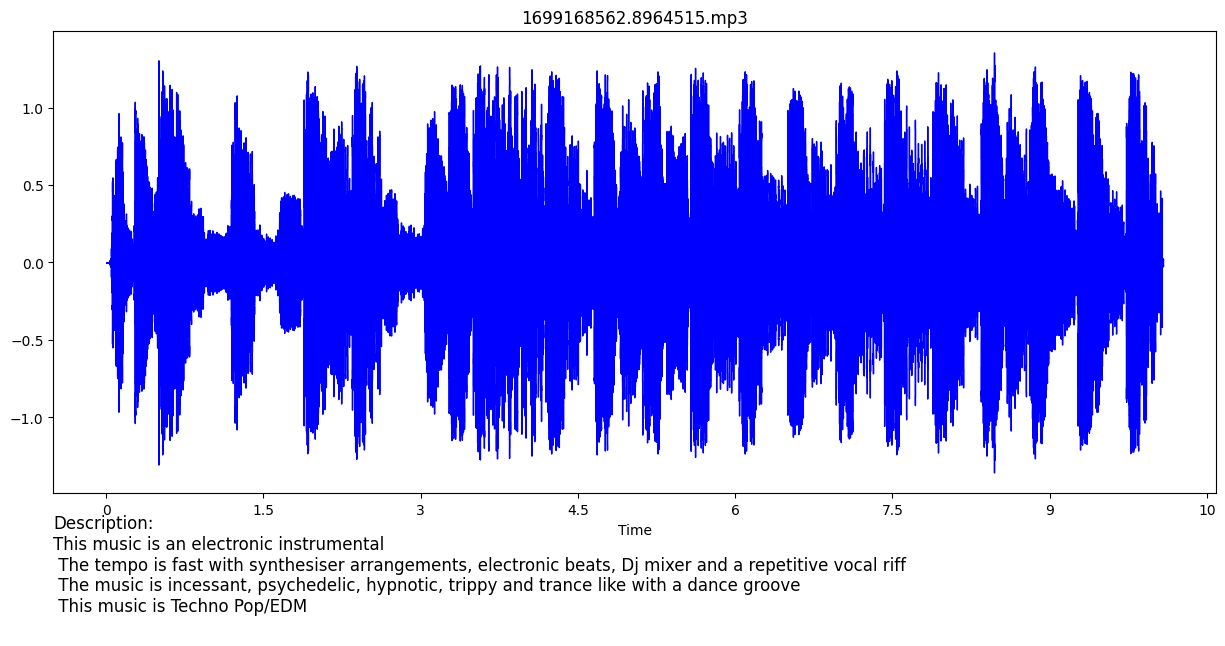

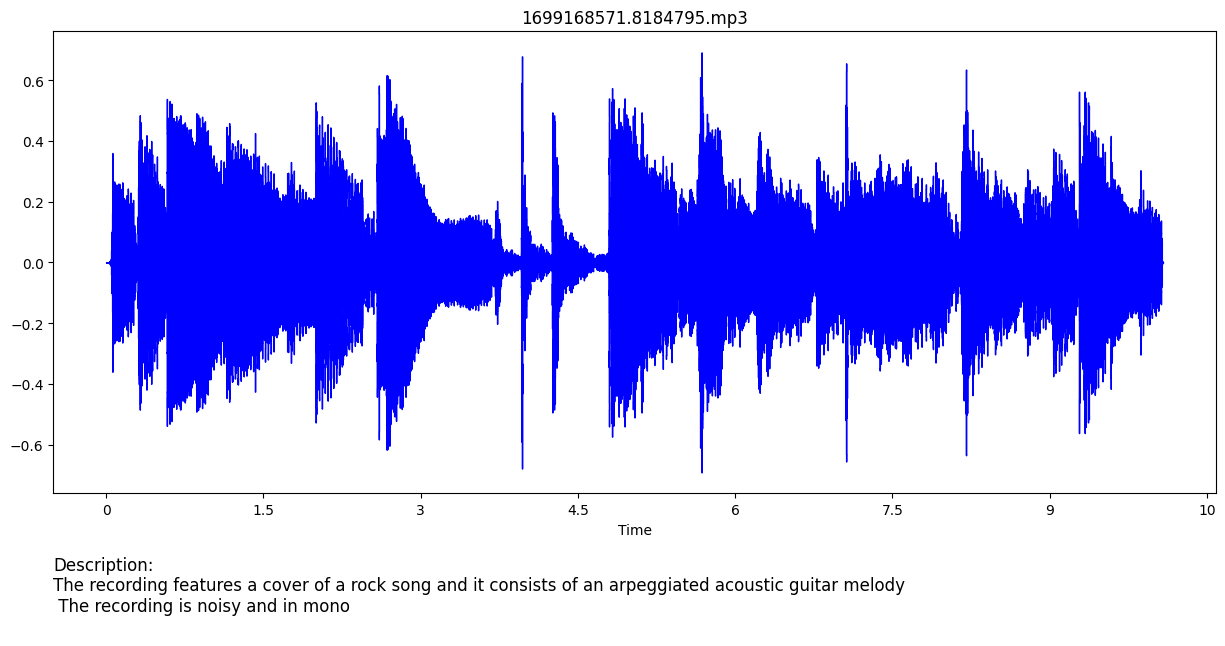

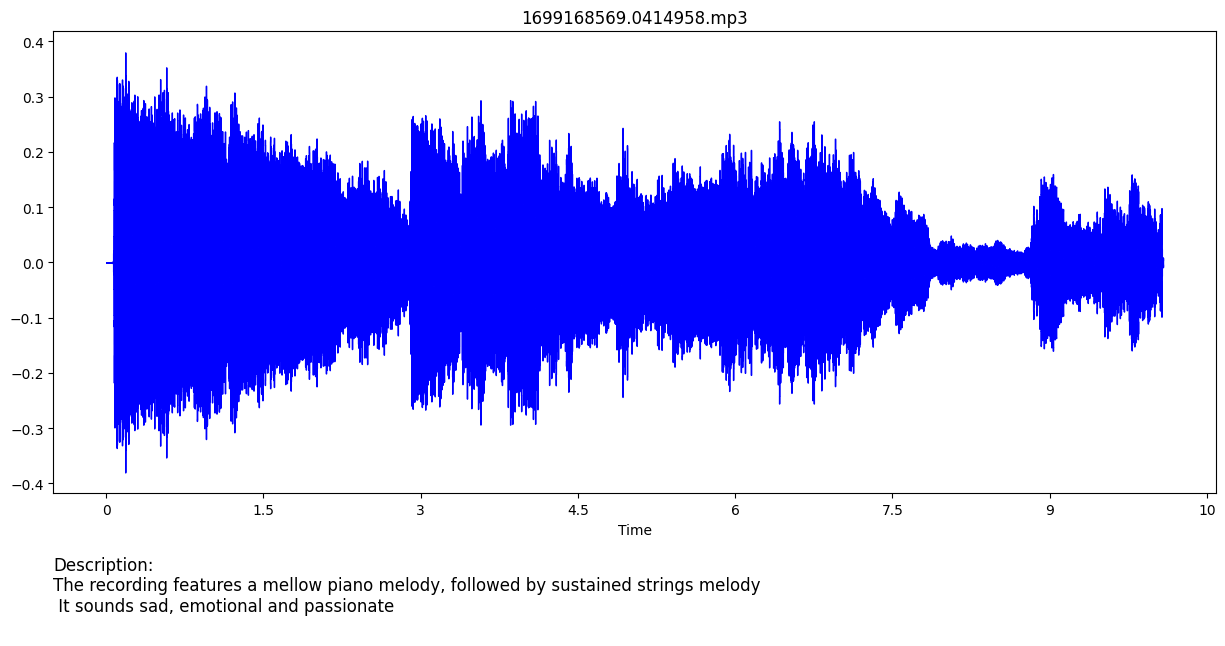

In [19]:
plot_samples_wave(data_dir_train, df_train, 3)

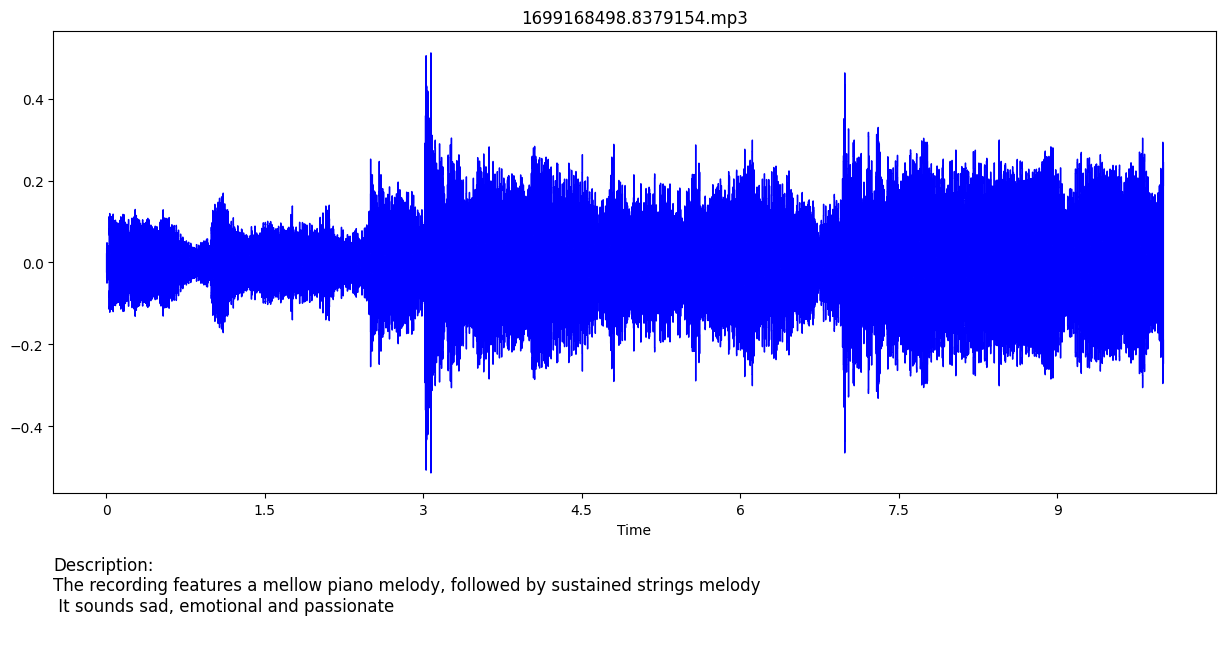

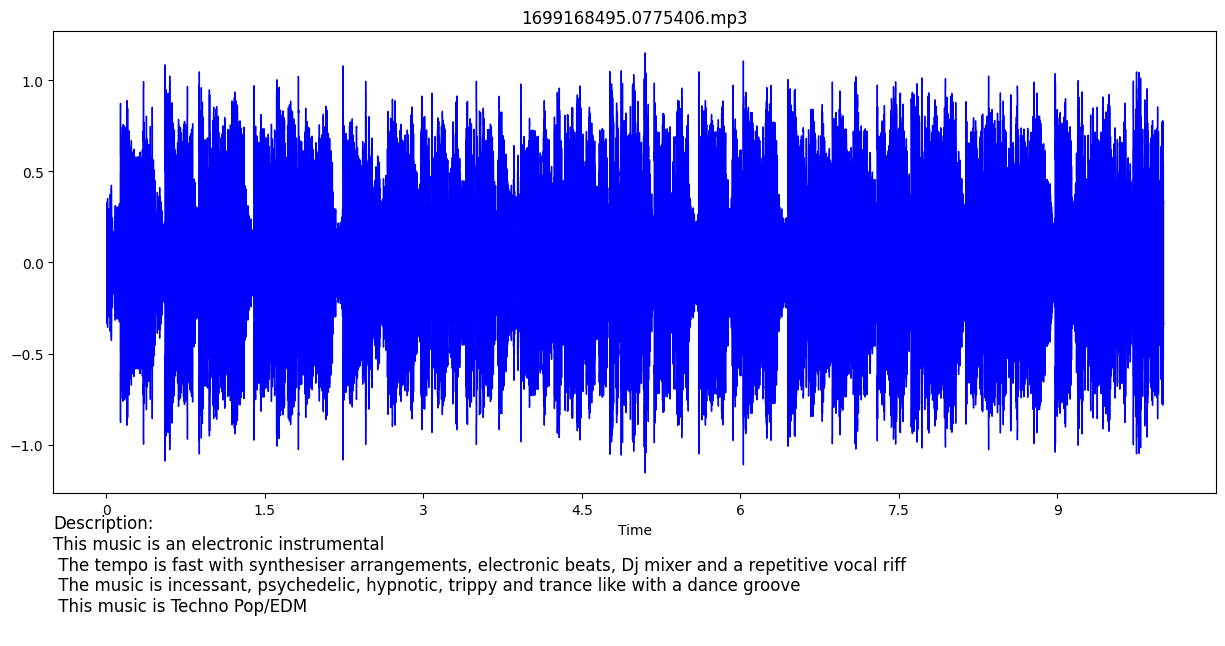

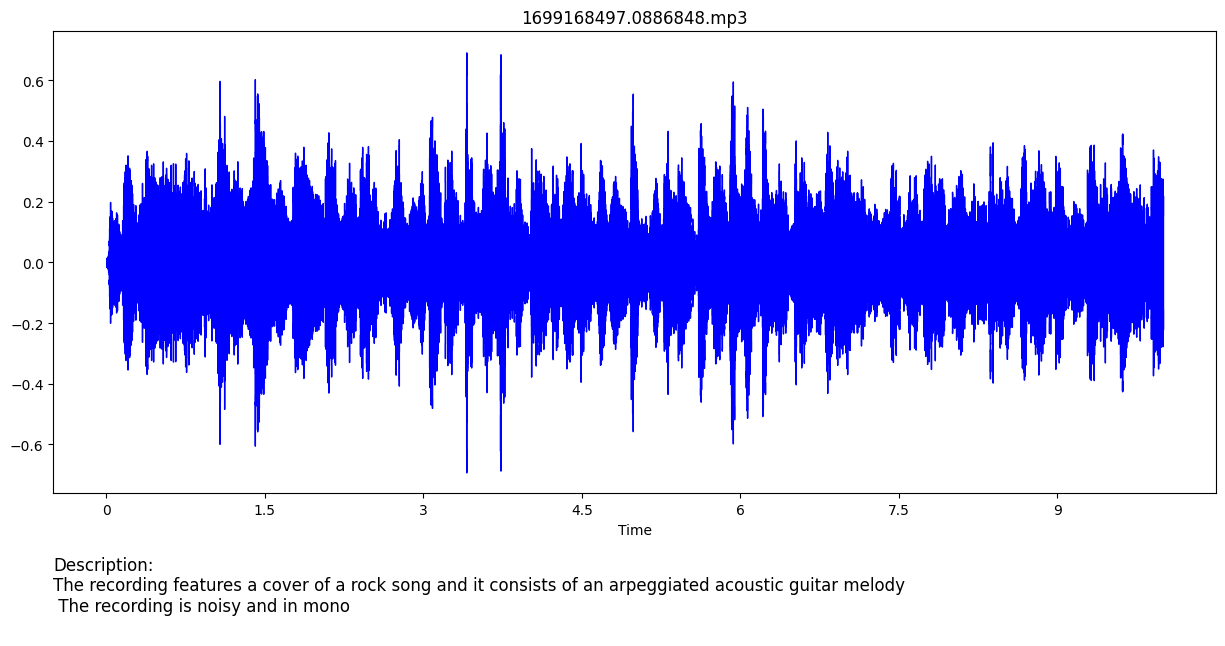

In [20]:
plot_samples_wave(data_dir_test, df_test, 3)

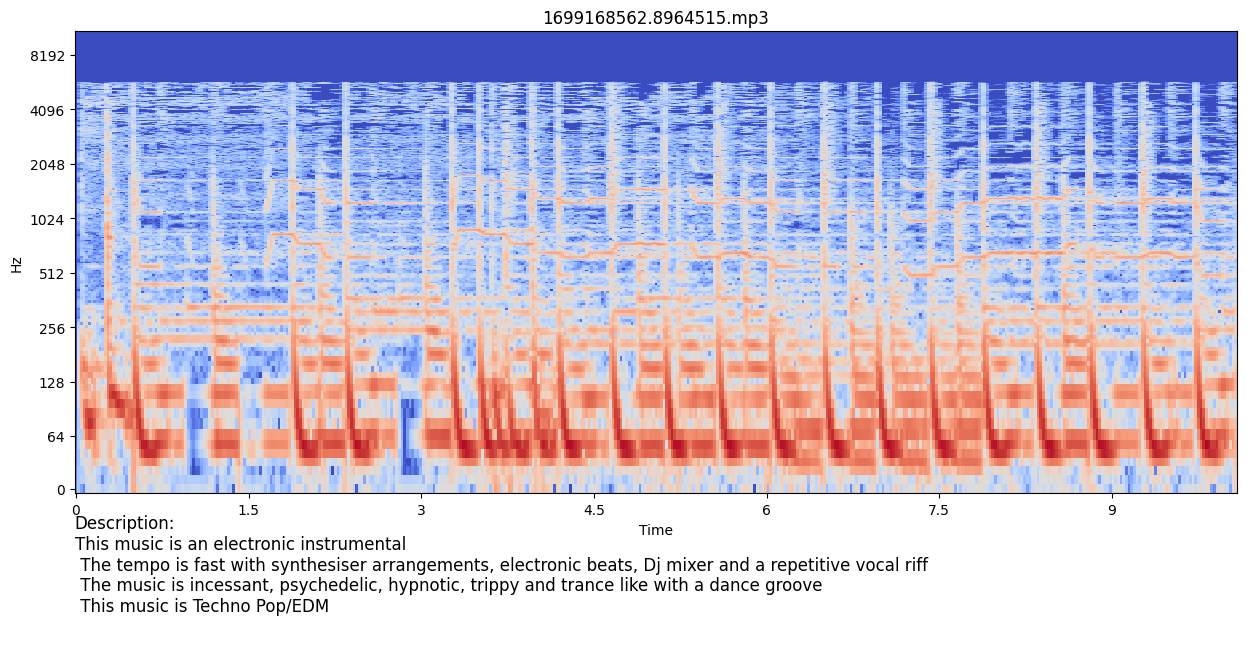

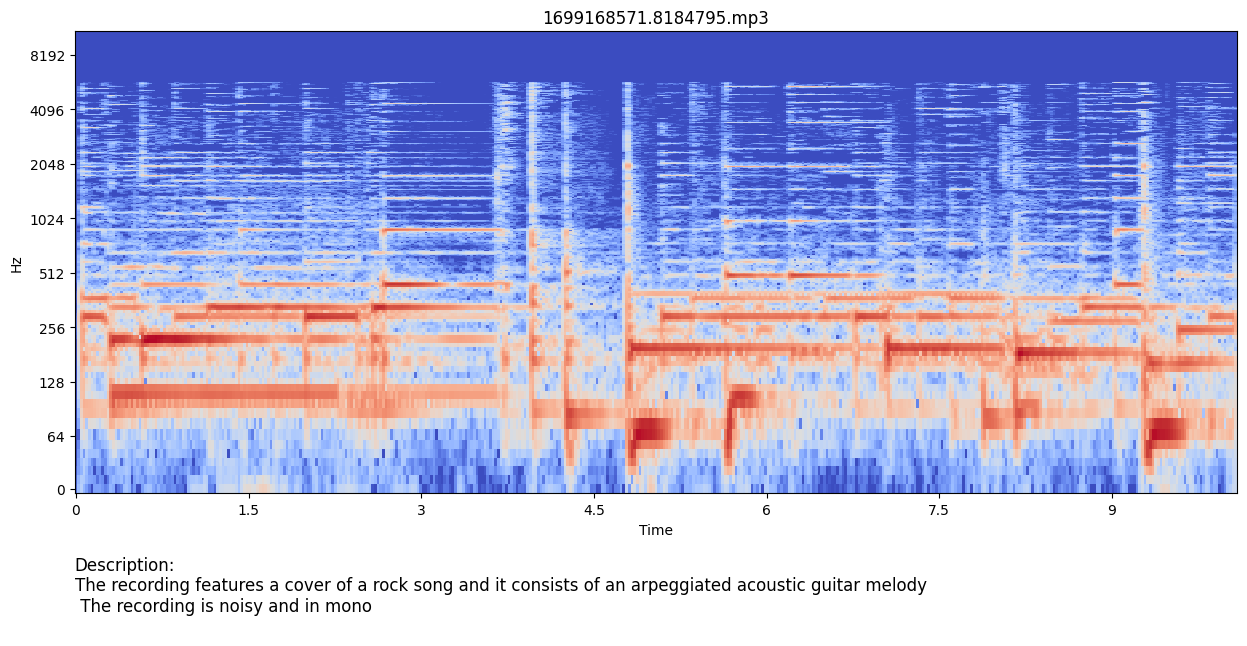

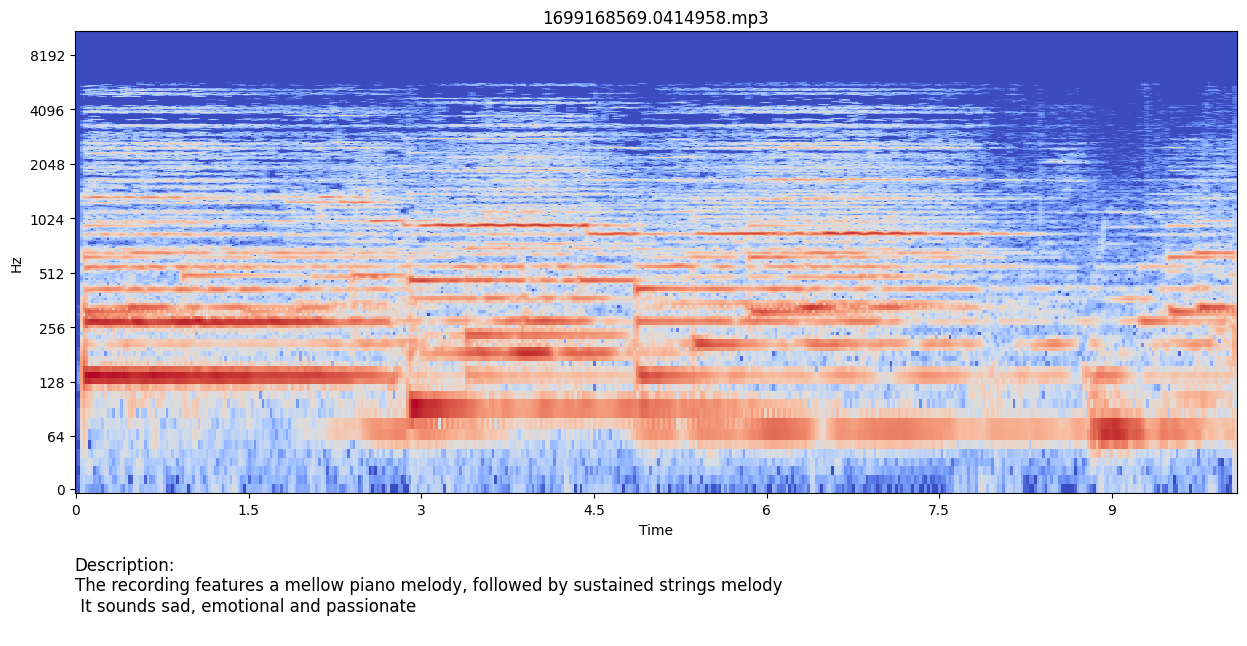

In [21]:
plot_samples_spectrum(data_dir_train, df_train, 3)

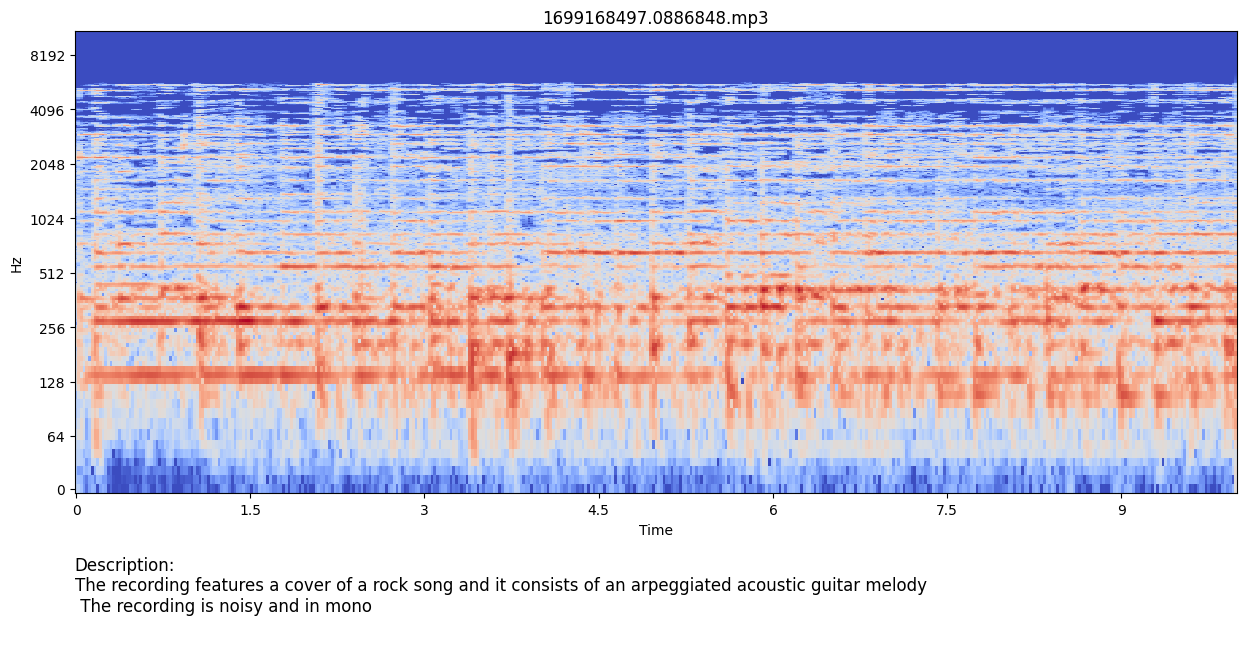

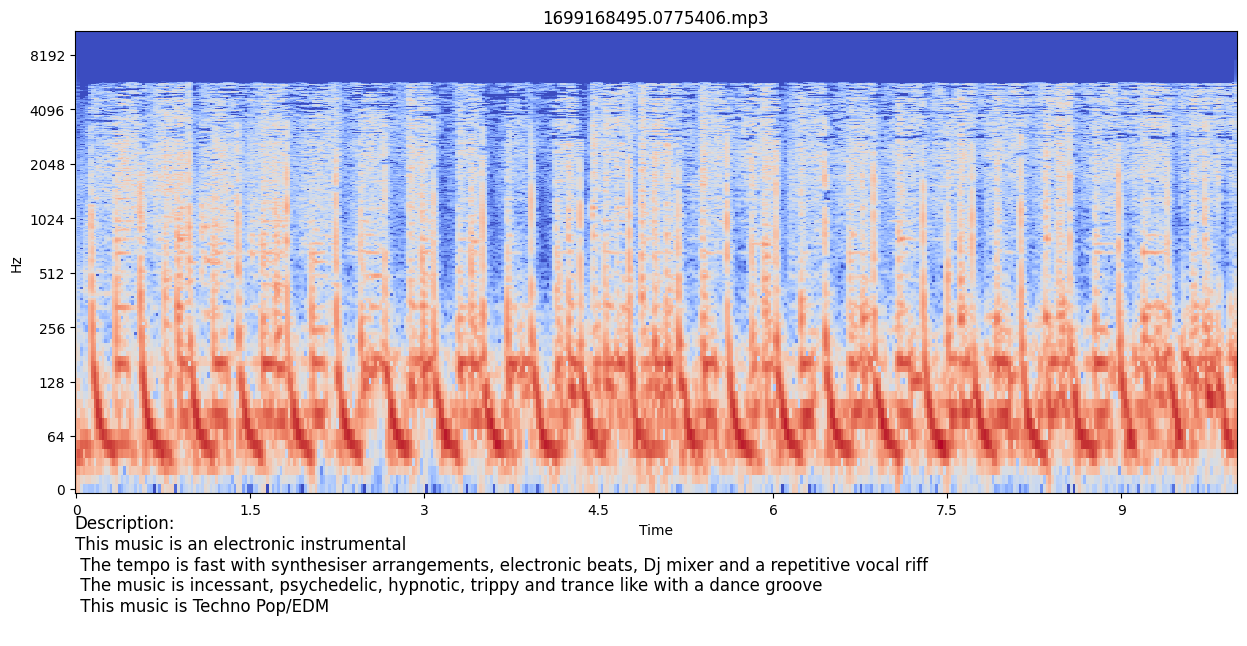

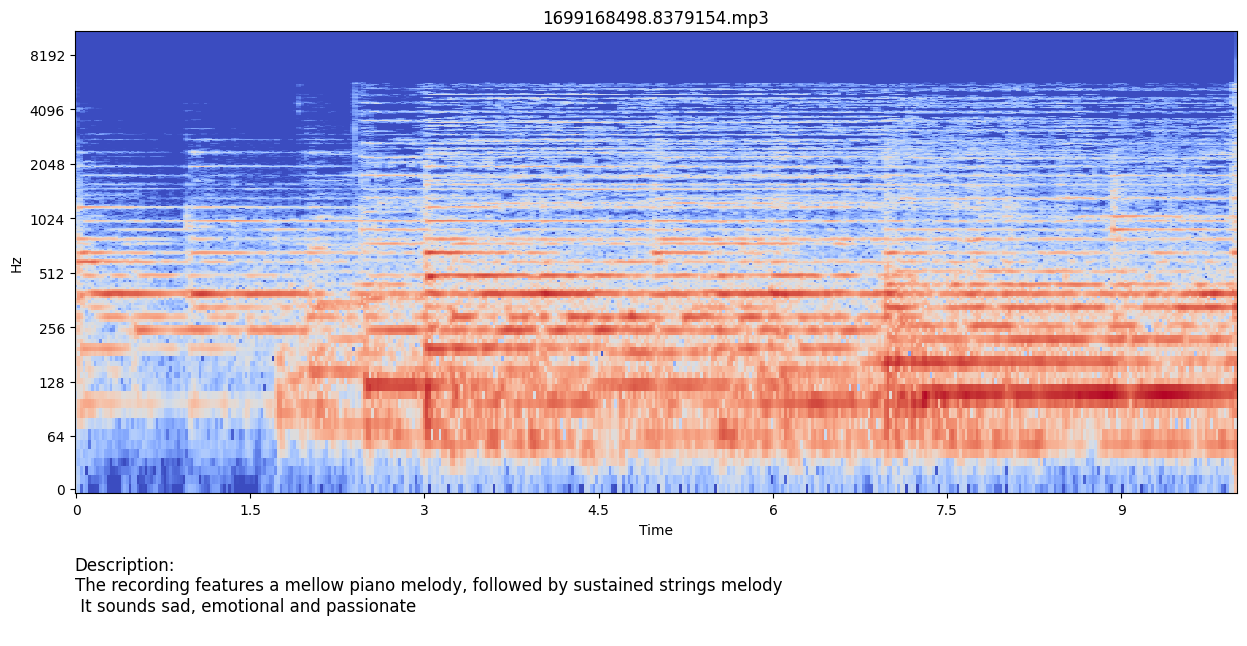

In [22]:
plot_samples_spectrum(data_dir_test, df_test, 3)

/Users/macos/miniconda3/envs/zaic2023/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/macos/miniconda3/envs/zaic2023/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/Users/macos/miniconda3/envs/zaic2023/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/macos/miniconda3/envs/zaic2023/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues 

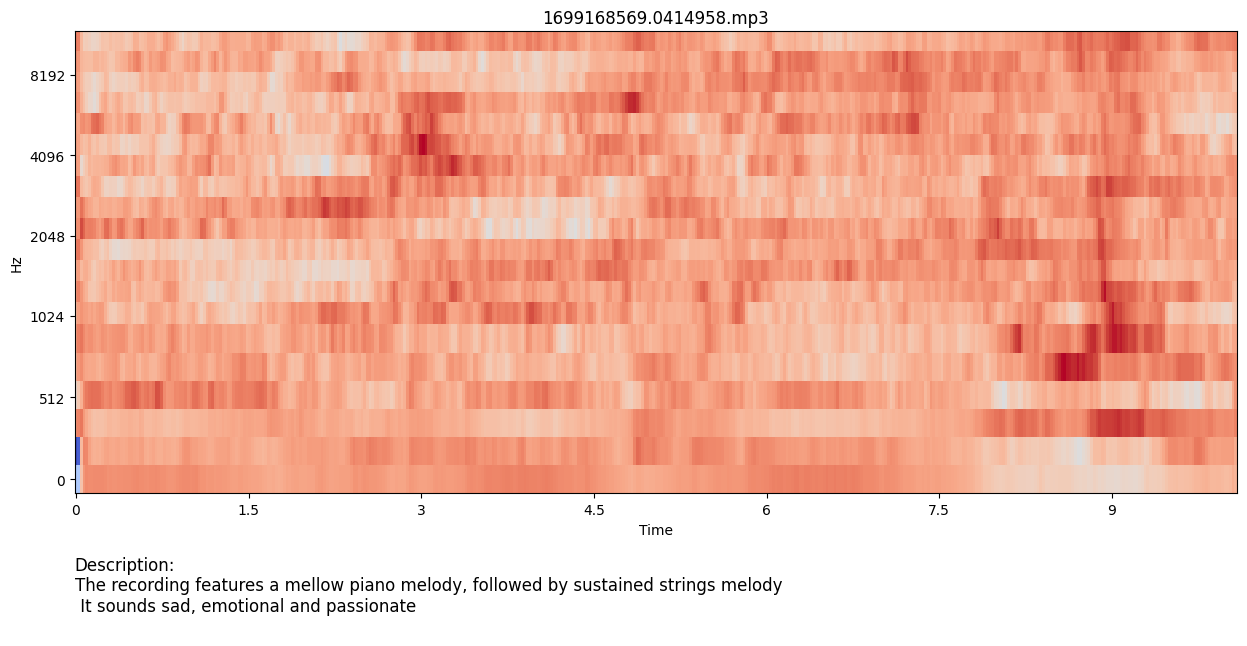

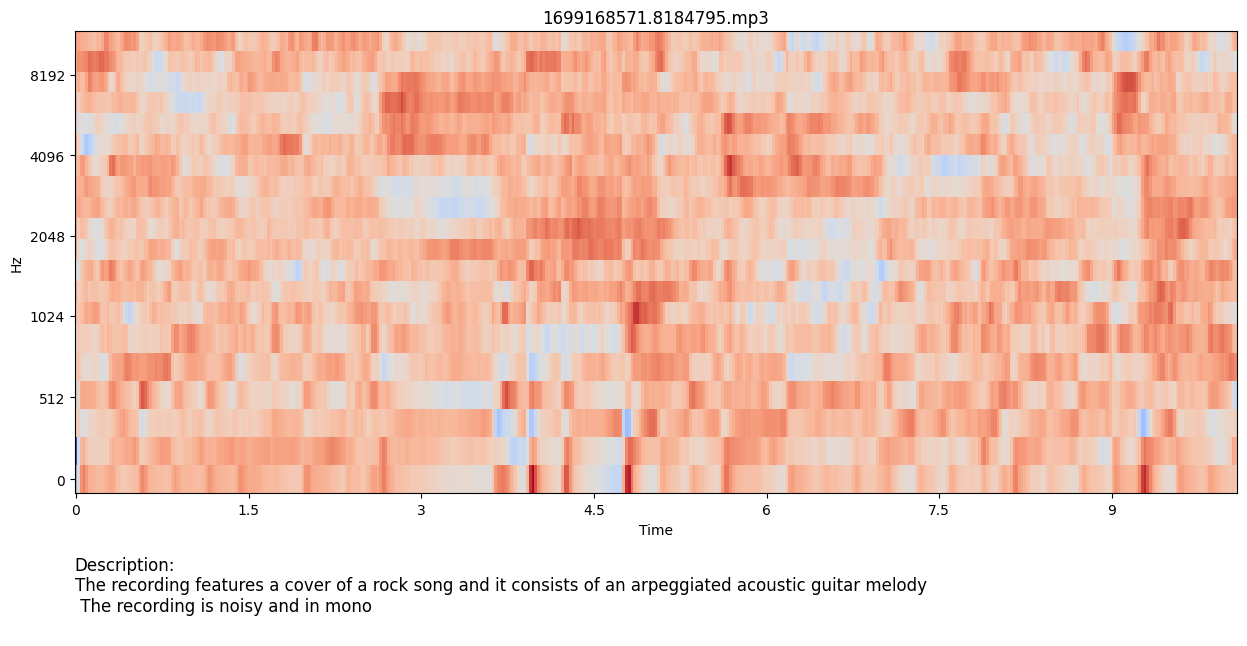

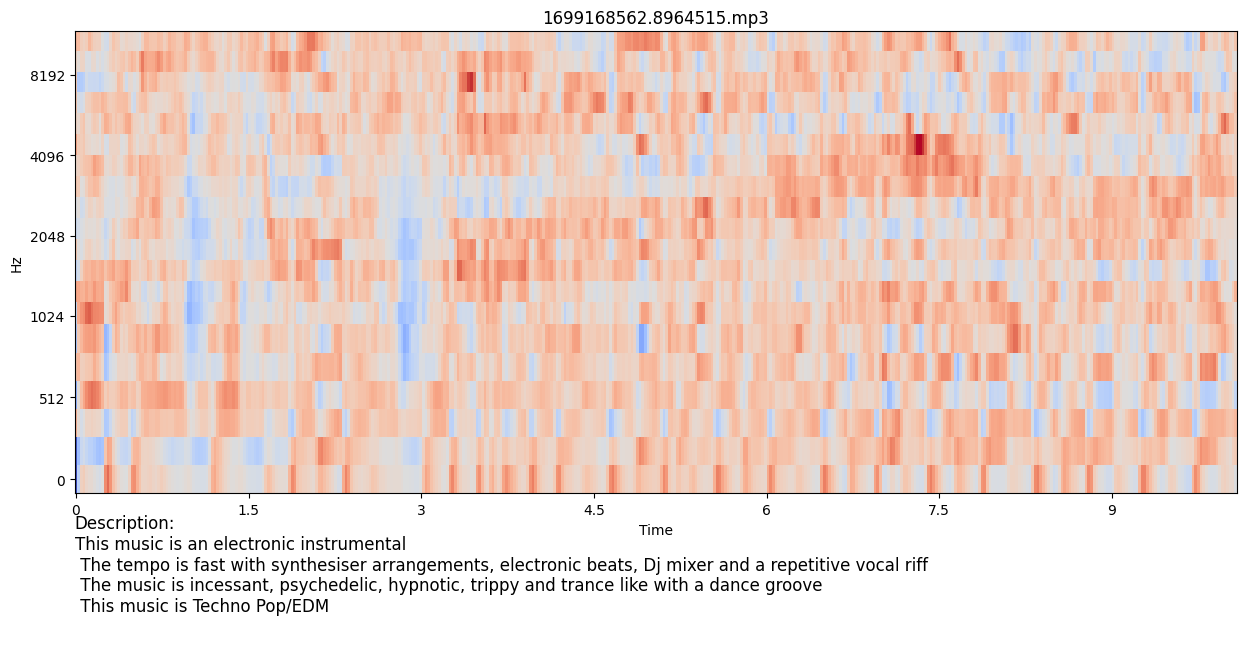

In [23]:
plot_samples_mfcc(data_dir_train, df_train, 3)

/Users/macos/miniconda3/envs/zaic2023/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/macos/miniconda3/envs/zaic2023/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/Users/macos/miniconda3/envs/zaic2023/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/macos/miniconda3/envs/zaic2023/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues 

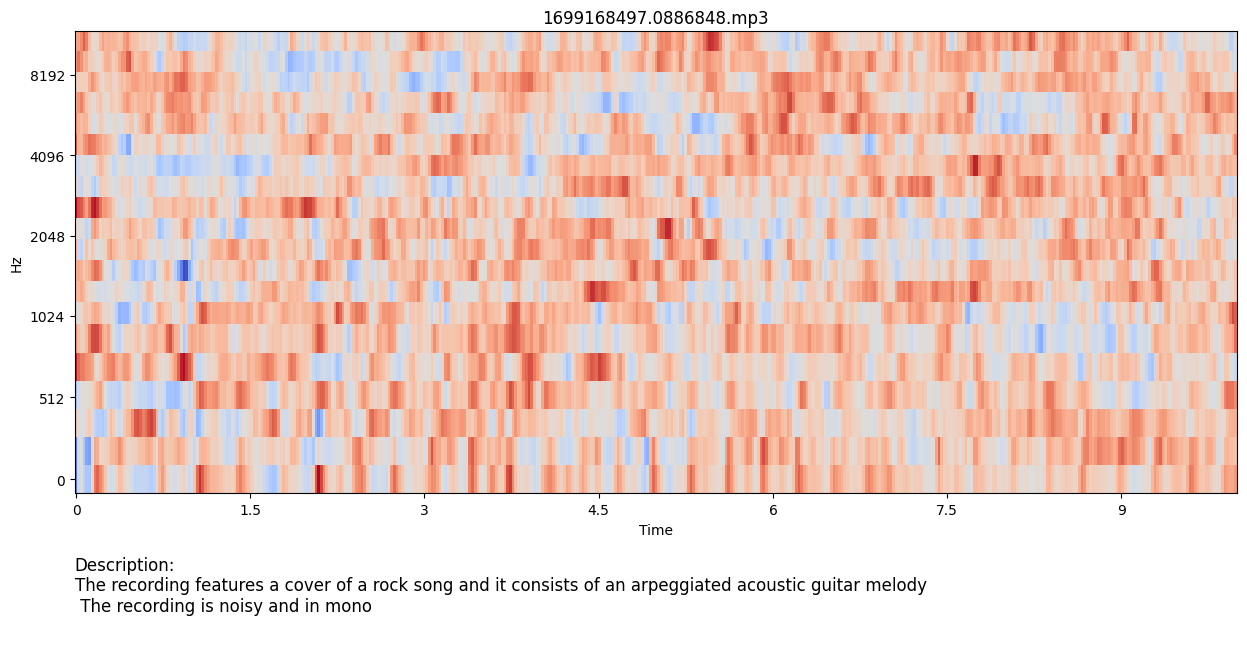

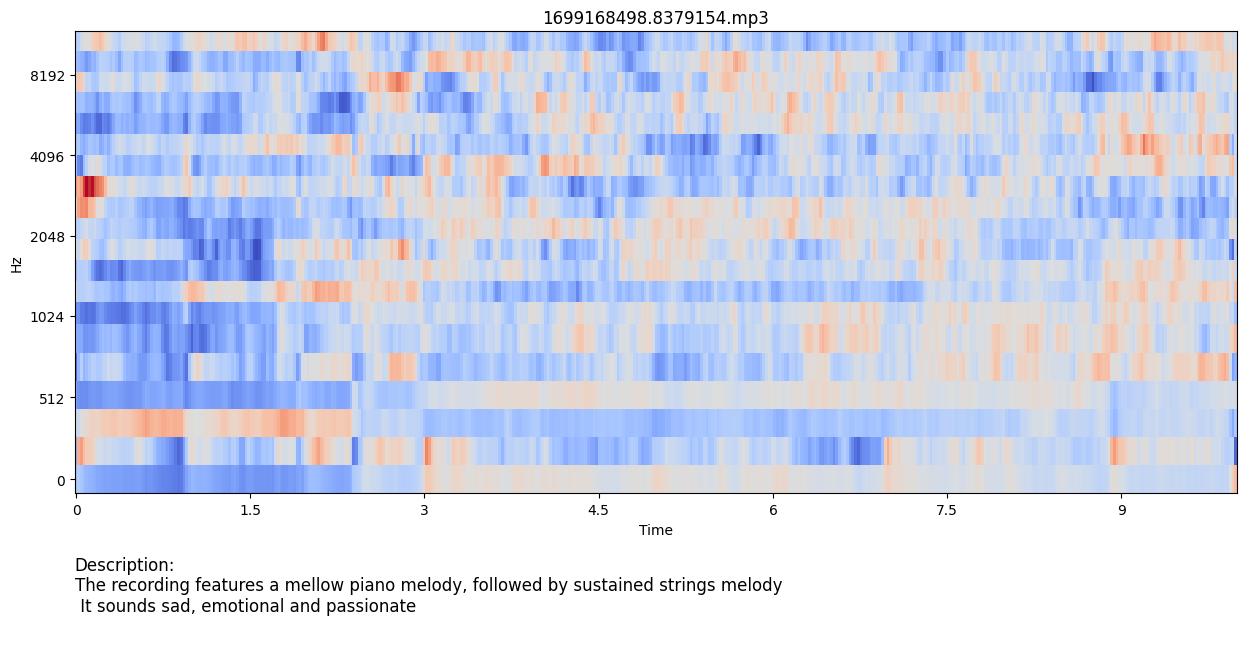

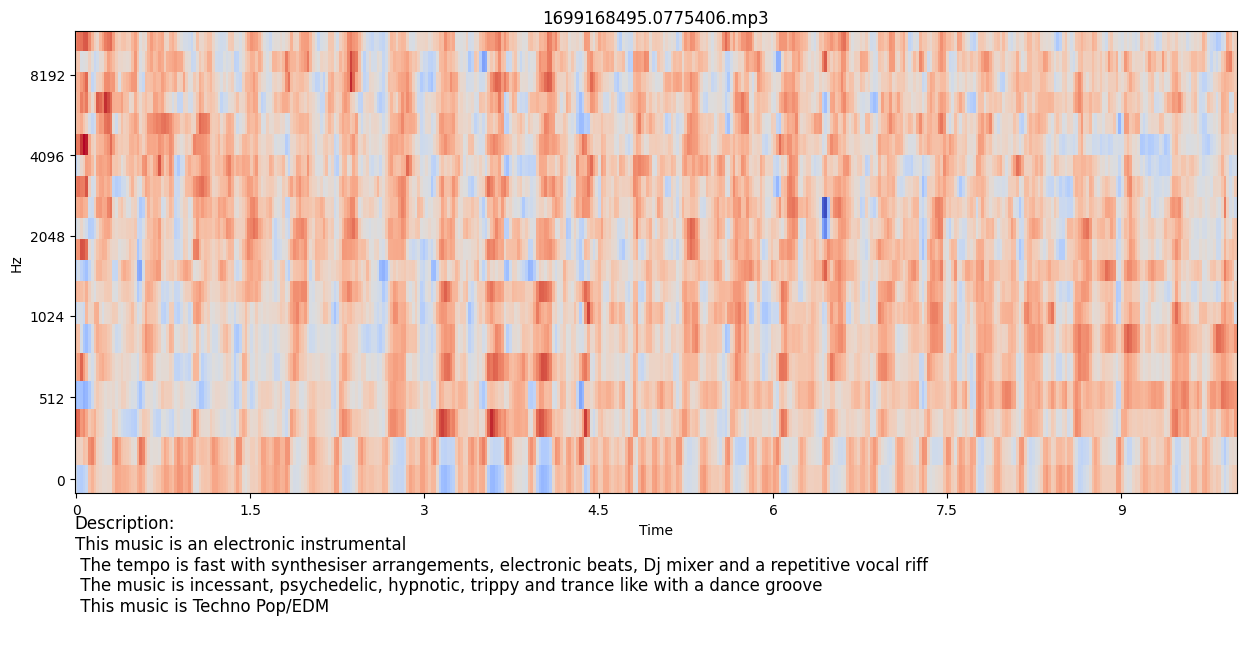

In [24]:
plot_samples_mfcc(data_dir_test, df_test, 3)